In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)
# Data transformation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# warnings deactivate
import warnings
warnings.filterwarnings('ignore')

In [ ]:
conda update bottleneck


In [1]:
import pandas as pd

# Correct way to format float display
pd.options.display.float_format = '{:.2f}'.format

# Load your dataset (example)
df = pd.read_csv('C://Users//schan//Downloads//bank-additional//bank-additional//bank-additional-full.csv', sep=';')

# Display the first 5 rows with formatted float values
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [2]:
df.shape

(41188, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
col_cat = list(df.select_dtypes(include=['object']).columns)
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [5]:
df.loc[:, col_cat] = df[col_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [9]:
X = df.iloc[:,:-1]  #input columns
y = df.iloc[:,-1]    #target column 

In [10]:
from sklearn.preprocessing import OrdinalEncoder  # 👈 Make sure this is included

# Assume your DataFrame is already defined, e.g., df or X
X = df.copy()  # Optional, use if you're working on a copy

# Step 1: Identify categorical columns
col_cat = X.select_dtypes(include='object').columns.tolist()

# Step 2: Initialize the encoder
oe = OrdinalEncoder()

# Step 3: Fit and transform the categorical columns
oe.fit(X[col_cat])
X_cat_enc = oe.transform(X[col_cat])

# Step 4: Convert the result back to a DataFrame
X_cat_encoded_df = pd.DataFrame(X_cat_enc, columns=col_cat, index=X.index)

# Step 5: Drop original categorical columns and join encoded ones
X_encoded = X.drop(columns=col_cat).join(X_cat_encoded_df)

# View the encoded DataFrame
print(X_encoded.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0          1.10           93.99   
1   57       149         1    999         0          1.10           93.99   
2   37       226         1    999         0          1.10           93.99   
3   40       151         1    999         0          1.10           93.99   
4   56       307         1    999         0          1.10           93.99   

   cons.conf.idx  euribor3m  nr.employed  ...  marital  education  default  \
0         -36.40       4.86      5191.00  ...     1.00       0.00     0.00   
1         -36.40       4.86      5191.00  ...     1.00       3.00     1.00   
2         -36.40       4.86      5191.00  ...     1.00       3.00     0.00   
3         -36.40       4.86      5191.00  ...     1.00       1.00     0.00   
4         -36.40       4.86      5191.00  ...     1.00       3.00     0.00   

   housing  loan  contact  month  day_of_week  poutcome    y  
0    

In [12]:
X = pd.read_csv("C://Users//schan//Downloads//bank-additional//bank-additional//bank-additional-full.csv", sep=';')

X_cat_enc

array([[3., 1., 0., ..., 1., 1., 0.],
       [7., 1., 3., ..., 1., 1., 0.],
       [7., 1., 3., ..., 1., 1., 0.],
       ...,
       [5., 1., 6., ..., 0., 1., 0.],
       [9., 1., 5., ..., 0., 1., 1.],
       [5., 1., 5., ..., 0., 0., 0.]])

In [13]:
X_cat_enc

array([[3., 1., 0., ..., 1., 1., 0.],
       [7., 1., 3., ..., 1., 1., 0.],
       [7., 1., 3., ..., 1., 1., 0.],
       ...,
       [5., 1., 6., ..., 0., 1., 0.],
       [9., 1., 5., ..., 0., 1., 1.],
       [5., 1., 5., ..., 0., 0., 0.]])

In [14]:
X_cat_enc = pd.DataFrame(X_cat_enc)
X_cat_enc.columns = col_cat
X_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.00
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,0.00
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,0.00
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,0.00
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,1.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,0.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,0.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,1.00


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
X = pd.read_csv("C://Users//schan//Downloads//bank-additional//bank-additional//bank-additional-full.csv", sep=';')

# Define numerical columns
col_num = ['age', 'duration', 'campaign', 'pdays',
           'previous', 'emp.var.rate', 'cons.price.idx',
           'cons.conf.idx', 'euribor3m', 'nr.employed']

# Initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the numerical features
X_num_enc = scaler.fit_transform(X[col_num])

# Optional: convert result to DataFrame for better viewing
X_num_encoded_df = pd.DataFrame(X_num_enc, columns=col_num, index=X.index)

# Show result
print(X_num_encoded_df.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0 0.48      0.05      0.00   1.00      0.00          0.94            0.70   
1 0.49      0.03      0.00   1.00      0.00          0.94            0.70   
2 0.25      0.05      0.00   1.00      0.00          0.94            0.70   
3 0.28      0.03      0.00   1.00      0.00          0.94            0.70   
4 0.48      0.06      0.00   1.00      0.00          0.94            0.70   

   cons.conf.idx  euribor3m  nr.employed  
0           0.60       0.96         0.86  
1           0.60       0.96         0.86  
2           0.60       0.96         0.86  
3           0.60       0.96         0.86  
4           0.60       0.96         0.86  


In [17]:
X_num_enc

array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

In [18]:
X_num_enc = pd.DataFrame(X_num_enc)
X_num_enc.columns = col_num
X_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...
41183,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


In [19]:
x_enc = pd.concat([X_cat_enc, X_num_enc], axis=1)
x_enc   

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,...,0.48,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
1,7.00,1.00,3.00,1.00,0.00,0.00,1.00,6.00,1.00,1.00,...,0.49,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
2,7.00,1.00,3.00,0.00,2.00,0.00,1.00,6.00,1.00,1.00,...,0.25,0.05,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
3,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,1.00,...,0.28,0.03,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
4,7.00,1.00,3.00,0.00,0.00,2.00,1.00,6.00,1.00,1.00,...,0.48,0.06,0.00,1.00,0.00,0.94,0.70,0.60,0.96,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5.00,1.00,5.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,...,0.69,0.07,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41184,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,...,0.36,0.08,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41185,5.00,1.00,6.00,0.00,2.00,0.00,0.00,7.00,0.00,1.00,...,0.48,0.04,0.02,1.00,0.00,0.48,1.00,0.00,0.09,0.00
41186,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,...,0.33,0.09,0.00,1.00,0.00,0.48,1.00,0.00,0.09,0.00


In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' is your target column (e.g., X['y'])
y = X['y']

# Step 1: Initialize the encoder
le = LabelEncoder()

# Step 2: Fit and transform
y_enc = le.fit_transform(y)

# Step 3: Convert to Series with column name
y_enc = pd.Series(y_enc, name=y.name)

# Display encoded target
print(y_enc.head())


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


In [22]:
y
y_enc


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

# x_enc: your final feature DataFrame (categorical + numeric)
# y_enc: your encoded target variable (as Series)

# Select top 10 features using chi-square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_enc, y_enc)

# Convert results to DataFrame
dfscores = pd.DataFrame(fit.scores_, columns=["Chi2 Score"])
dfcolumns = pd.DataFrame(x_enc.columns, columns=["Feature"])

# Concatenate to see feature names with scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Sort by score descending
featureScores = featureScores.sort_values(by="Chi2 Score", ascending=False)

# Show top features
print(featureScores.head(10))


         Feature  Chi2 Score
10             y    36548.00
19     euribor3m      890.69
6        contact      547.96
16  emp.var.rate      541.30
20   nr.employed      502.66
15      previous      441.45
12      duration      358.02
3        default      321.92
2      education      167.61
14         pdays      157.98


In [25]:
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs    Score
10             y 36548.00
19     euribor3m   890.69
6        contact   547.96
16  emp.var.rate   541.30
20   nr.employed   502.66
15      previous   441.45
12      duration   358.02
3        default   321.92
2      education   167.61
14         pdays   157.98


In [27]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features using mutual information
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(x_enc, y_enc)

# Convert scores and columns to DataFrames
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_enc.columns)

# Combine into a single DataFrame
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']

# Show top 10 features
print(featureScores.nlargest(10, 'Score'))

    

             Specs  Score
10               y   0.35
12        duration   0.08
19       euribor3m   0.07
18   cons.conf.idx   0.07
17  cons.price.idx   0.07
20     nr.employed   0.06
16    emp.var.rate   0.06
14           pdays   0.04
9         poutcome   0.03
7            month   0.03


In [29]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the model
model = ExtraTreesClassifier()

# Fit the model on your encoded features and target
model.fit(x_enc, y_enc)

# Show feature importances
importances = pd.Series(model.feature_importances_, index=x_enc.columns)
print(importances.sort_values(ascending=False).head(10))


y                0.84
euribor3m        0.02
nr.employed      0.02
duration         0.02
pdays            0.02
emp.var.rate     0.02
poutcome         0.01
cons.conf.idx    0.00
cons.price.idx   0.00
previous         0.00
dtype: float64


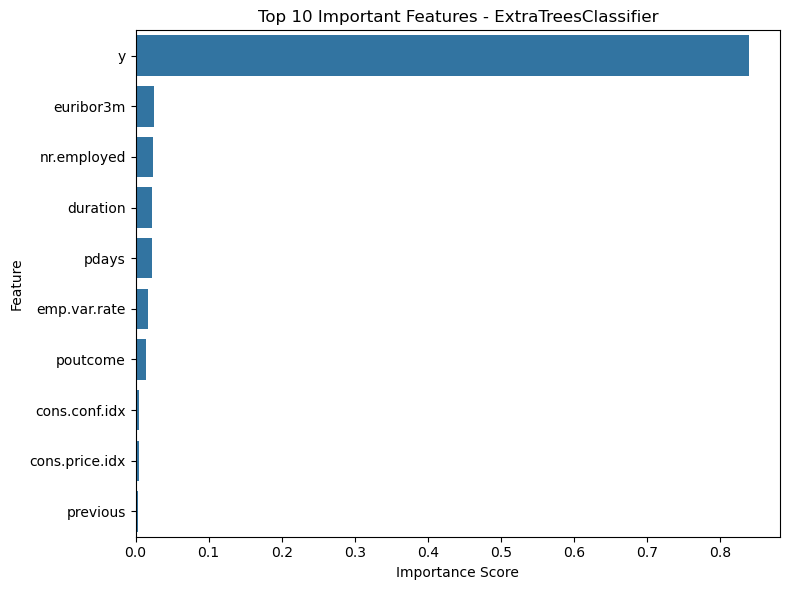

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 feature importances
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features - ExtraTreesClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [31]:
print(model.feature_importances_)

[0.00178638 0.00140132 0.00194488 0.00116529 0.00100037 0.00092471
 0.00300192 0.0034003  0.00196152 0.01465878 0.84030469 0.00330922
 0.02292245 0.00191588 0.02248147 0.00360739 0.01673672 0.00472019
 0.00479553 0.02482577 0.02313522]


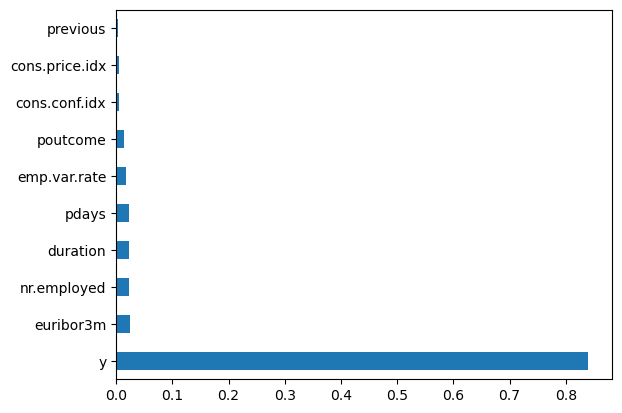

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

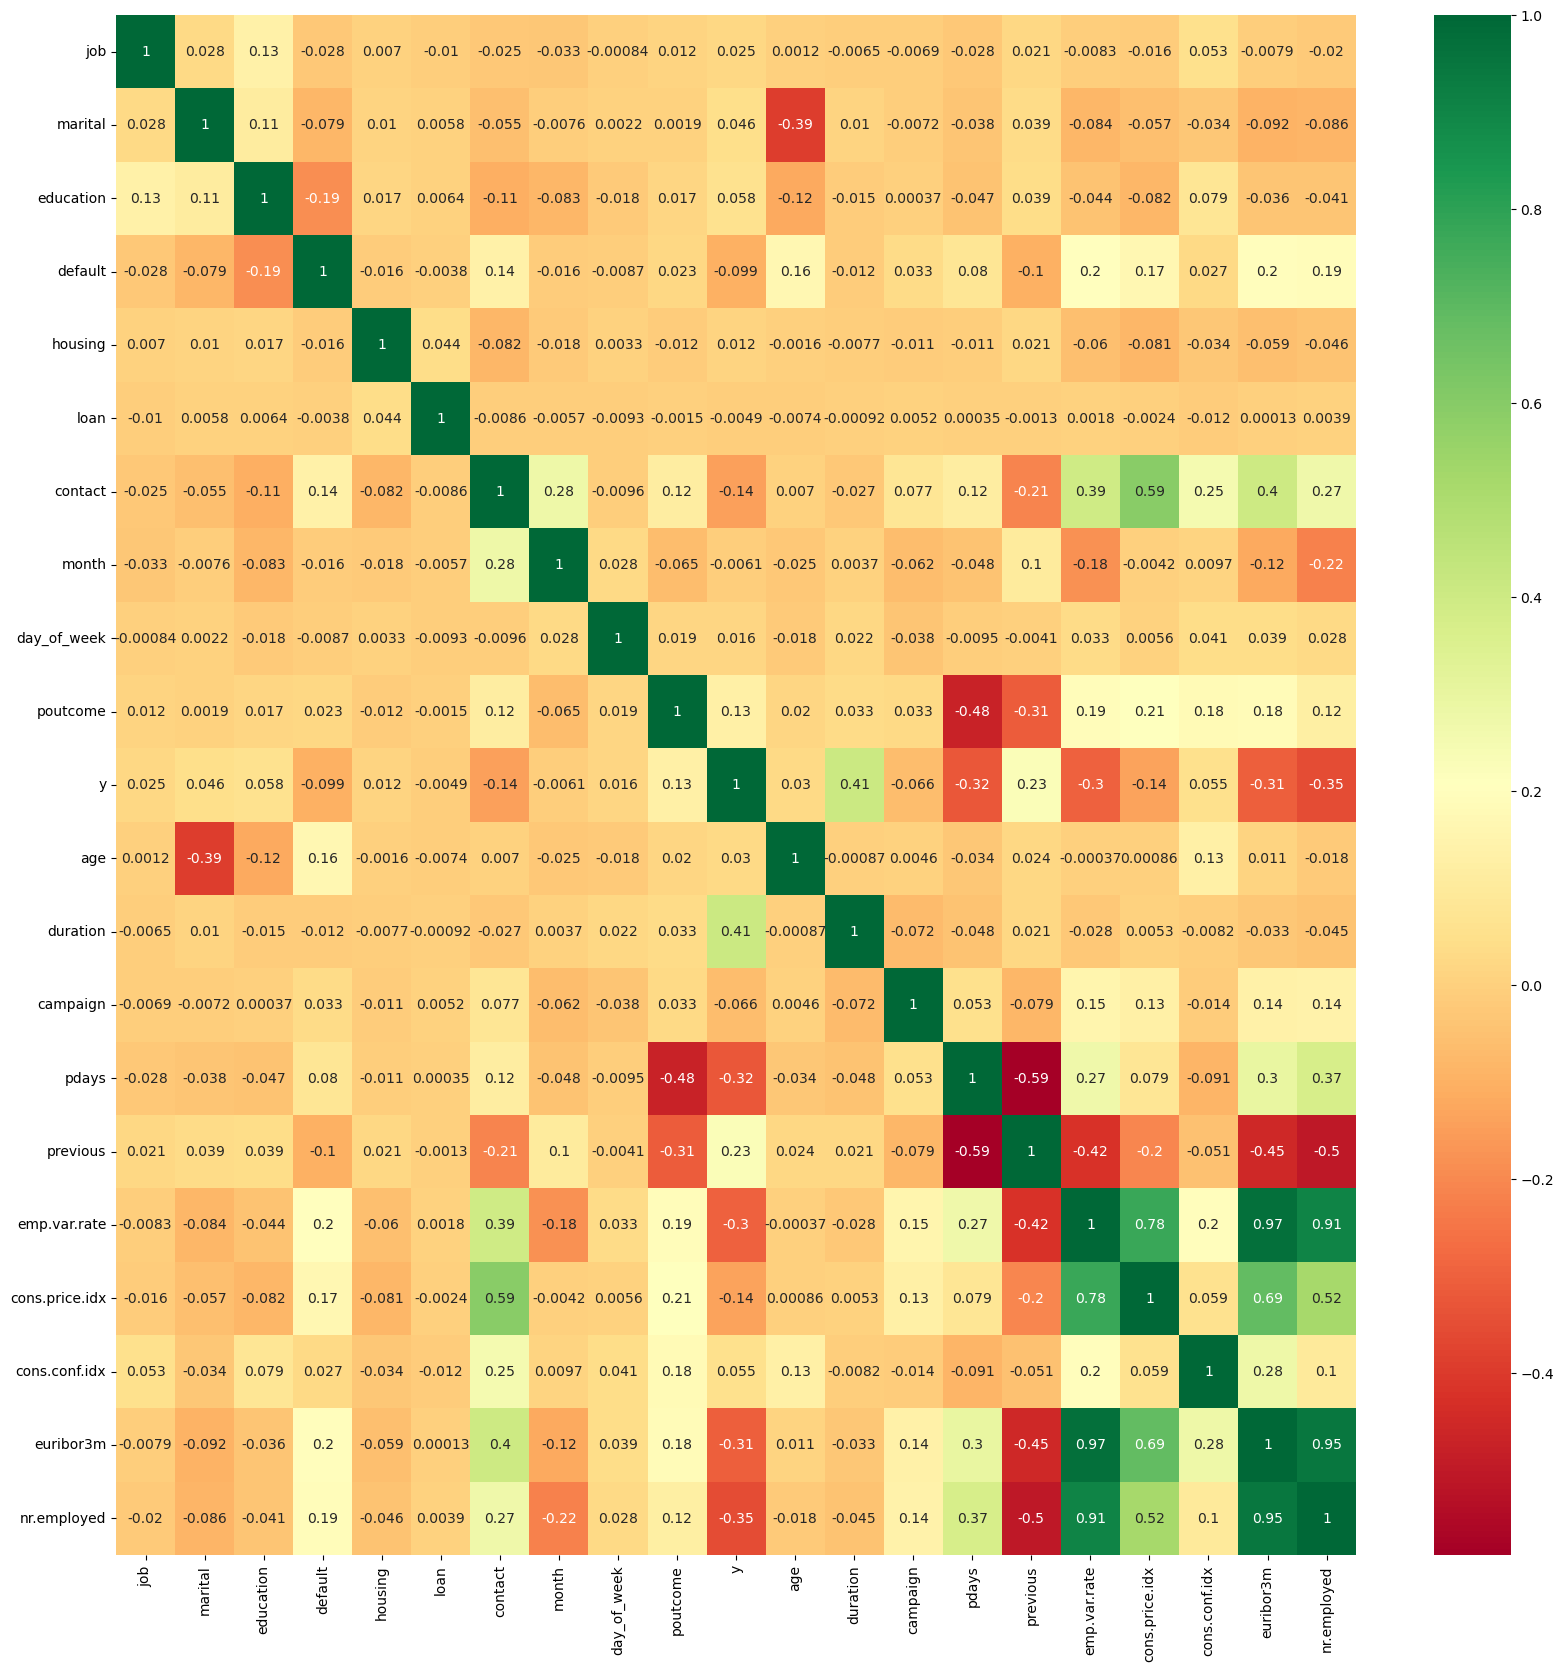

In [33]:
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
col = x_enc.columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [36]:
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m']
    

In [38]:
x_enc = x_enc[col]

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_enc, y_enc, test_size=0.33, random_state=1)

# Display the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (27595, 18)
X_test: (13593, 18)
y_train: (27595,)
y_test: (13593,)


In [41]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
yhat = model.predict(X_test)
print(yhat)

[0 0 0 ... 1 0 0]


In [44]:
from sklearn.metrics import accuracy_score

# Predict on test data
yhat = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 90.73


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
yhat = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 91.00


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on test data
yhat = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 89.13


In [49]:
print("Features impotance:", model.feature_importances_)

Features impotance: [0.04647323 0.0253656  0.03674599 0.00799468 0.01756369 0.01463475
 0.01031367 0.01529673 0.03493722 0.02256623 0.09225435 0.35045437
 0.03394448 0.01558887 0.00827012 0.01594051 0.03331656 0.21833891]


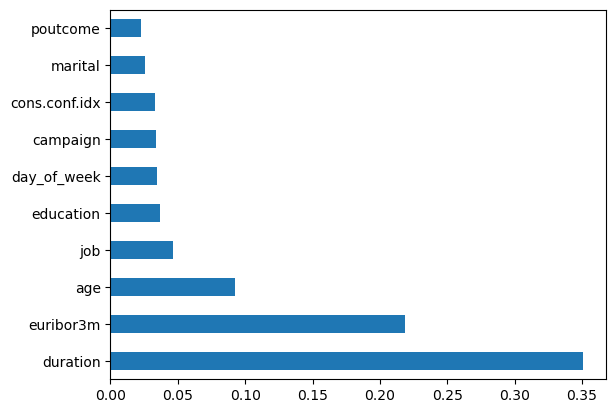

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=x_enc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [51]:
feat_importances.nlargest(10)

duration        0.35
euribor3m       0.22
age             0.09
job             0.05
education       0.04
day_of_week     0.03
campaign        0.03
cons.conf.idx   0.03
marital         0.03
poutcome        0.02
dtype: float64

In [52]:
col = feat_importances.nlargest(10).index
col

Index(['duration', 'euribor3m', 'age', 'job', 'education', 'day_of_week',
       'campaign', 'cons.conf.idx', 'marital', 'poutcome'],
      dtype='object')

In [53]:
X_train_dt = X_train[col]
X_test_dt = X_test[col]
model.fit(X_train_dt, y_train)
yhat = model.predict(X_test_dt)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 88.78


In [57]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.11
|   |--- feature_1 <= 0.13
|   |   |--- feature_0 <= 0.03
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- feature_0 <= 0.03
|   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |--- feature_6 <= 0.03
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.03
|   |   |   |   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |   |   |   |--- feature_5 <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_5 >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  0.02
|   |   |   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |   |   |--- feature_0 <= 0.02
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.02
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   

In [58]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

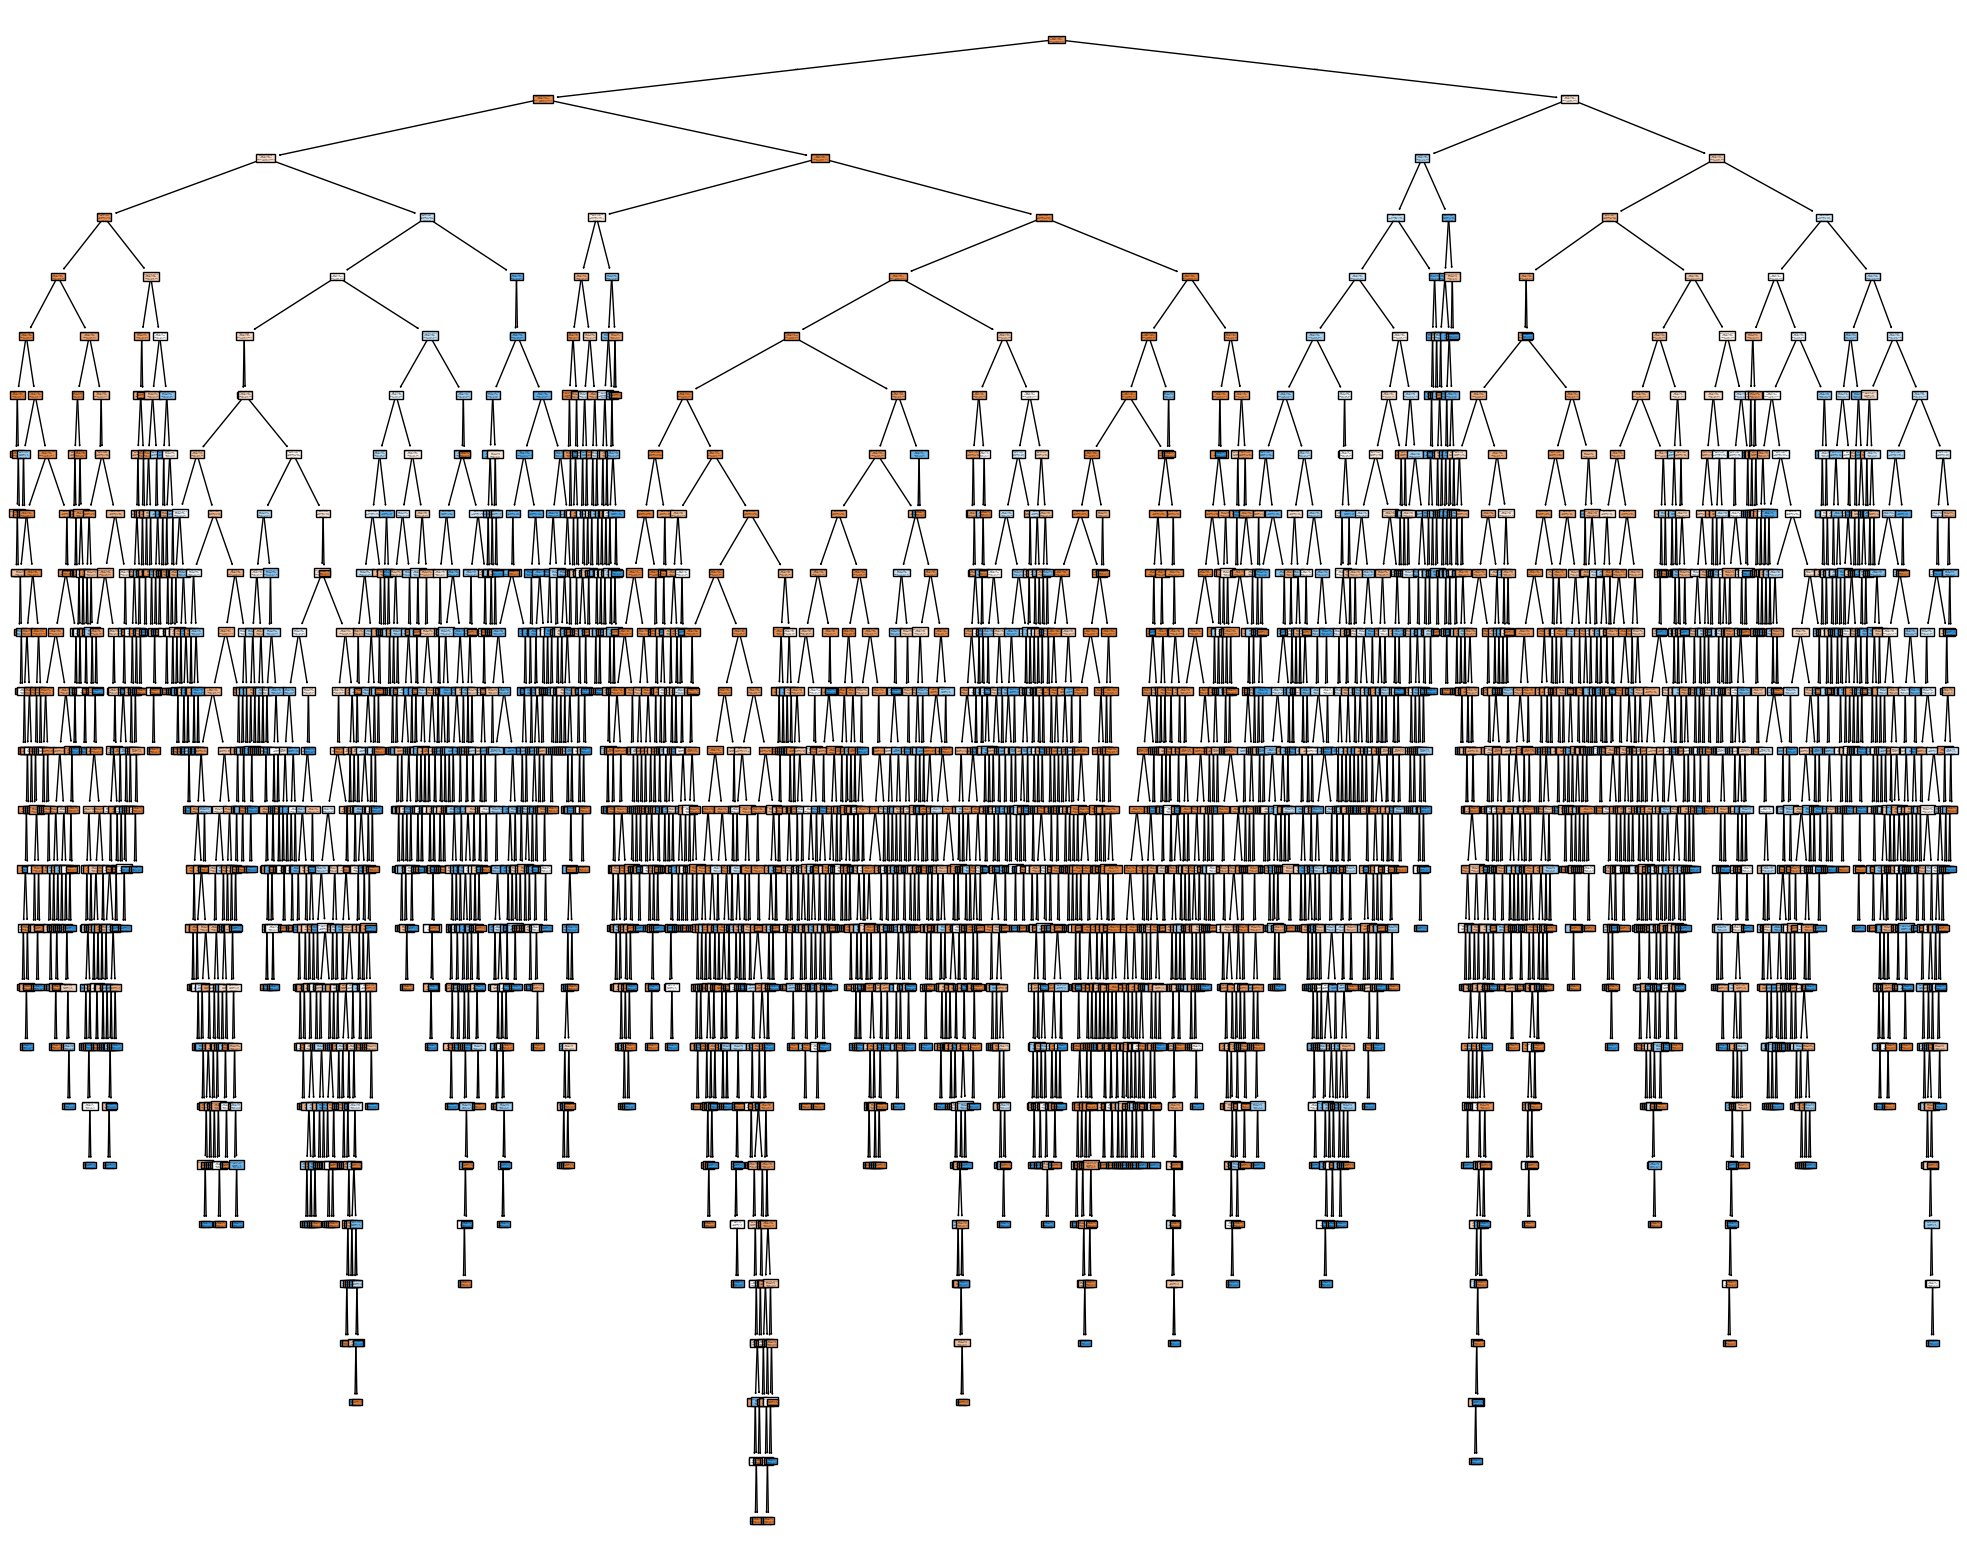

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
               feature_names = col, 
               class_names = y.unique(),
               filled = True)

In [63]:
!pip install graphviz




  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/91/4c/e0ce1ef95d4000ebc1c11801f9b944fa5910ecc15b5e351865763d8657f8/graphviz-0.21-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.3 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.3 kB 682.7 kB/s eta 0:00:01
   ---------------------------------------- 47.3/47.3 kB 805.7 kB/s eta 0:00:00


In [67]:
print("x_enc shape:", x_enc.shape)
print("X_train shape:", X_train.shape)
print("Length of bestfeatures.get_support():", len(bestfeatures.get_support()))



x_enc shape: (41188, 18)
X_train shape: (27595, 18)
Length of bestfeatures.get_support(): 21


In [6]:
from sklearn.feature_selection import SelectKBest, chi2

# Run on the correct input (X_train, not x_enc)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, y_train)

# Now this will work
selected_features = X_train.columns[bestfeatures.get_support()]


In [8]:
from sklearn.ensemble import ExtraTreesClassifier

# Instantiate and fit the model
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# To view feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False).head(10))


duration       0.256679
euribor3m      0.101984
age            0.086643
campaign       0.057554
job            0.057467
pdays          0.055343
education      0.055068
day_of_week    0.051768
nr.employed    0.038824
marital        0.036203
dtype: float64


In [9]:
def model_ac(x_train, y_train, x_test, y_test, clf):
    model = clf()
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    return accuracy

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

def model_ac(x_train, y_train, x_test, y_test, clf):
    model = clf()  # Instantiate the classifier
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    return accuracy_score(y_test, yhat)

# Call the function with the class, not the object
print('Accuracy: %.2f' % (model_ac(X_train, y_train, X_test, y_test, ExtraTreesClassifier) * 100))


Accuracy: 90.74


In [15]:
from sklearn.metrics import accuracy_score

def model_imp(x_train, y_train, clf):
    # Fit the model
    clf.fit(x_train, y_train)
    
    # Predict on training set
    y_pred = clf.predict(x_train)
    
    # Calculate and print accuracy
    acc = accuracy_score(y_train, y_pred)
    print(f"Training Accuracy: {acc:.2f}")
    
    # Return the trained model
    return clf


In [16]:
def model_imp(x_train, y_train, clf, feature_names):
    model = clf()
    model.fit(x_train, y_train)
    feat_importances = pd.Series(model.feature_importances_, index=feature_names)
    return feat_importances.sort_values(ascending=False)

    

In [17]:
imp = model_imp(X_train, y_train, ExtraTreesClassifier, X_train.columns)
print(imp)


duration          0.257951
euribor3m         0.096928
age               0.086965
campaign          0.058440
job               0.057685
education         0.055042
pdays             0.052983
day_of_week       0.051141
nr.employed       0.041748
marital           0.035079
emp.var.rate      0.030736
housing           0.027839
cons.conf.idx     0.026936
poutcome          0.026285
loan              0.020662
cons.price.idx    0.018731
month             0.016933
previous          0.014021
contact           0.013114
default           0.010780
dtype: float64


Input fields: 1 Accuracy: 88.60
Input fields: 2 Accuracy: 89.44
Input fields: 3 Accuracy: 89.98
Input fields: 4 Accuracy: 90.33
Input fields: 5 Accuracy: 90.24
Input fields: 6 Accuracy: 90.51
Input fields: 7 Accuracy: 90.86
Input fields: 8 Accuracy: 90.86
Input fields: 9 Accuracy: 90.97
Input fields: 10 Accuracy: 90.93
Input fields: 11 Accuracy: 90.93
Input fields: 12 Accuracy: 90.69
Input fields: 13 Accuracy: 90.62
Input fields: 14 Accuracy: 90.80
Input fields: 15 Accuracy: 90.73
Input fields: 16 Accuracy: 90.72
Input fields: 17 Accuracy: 90.72
Input fields: 18 Accuracy: 90.79
Input fields: 19 Accuracy: 90.66
Input fields: 20 Accuracy: 90.82


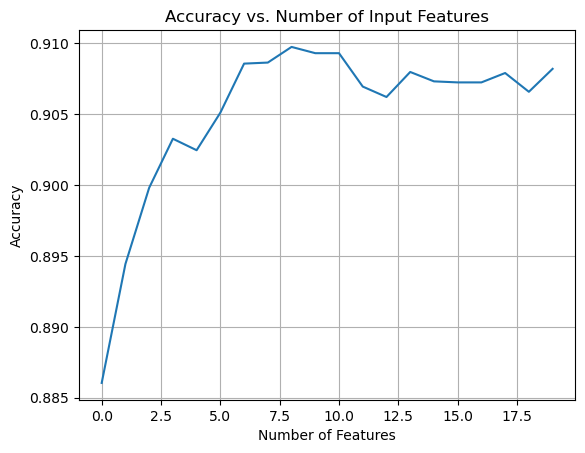

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Define function that trains and evaluates the model
def model_ac(x_train, y_train, x_test, y_test, clf):
    model = clf()  # Instantiate the classifier
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    return accuracy_score(y_test, yhat)

# Start with an empty list to store columns and accuracy scores
col = []
ac = []

# Loop over important features
for c in imp.index:
    col.append(c)
    acc = model_ac(X_train[col], y_train, X_test[col], y_test, ExtraTreesClassifier)  # Pass class, not object
    ac.append(acc)
    print('Input fields:', len(col), 'Accuracy: %.2f' % (acc * 100))

# Plot the accuracy
ac = pd.Series(ac)
ac.plot(title="Accuracy vs. Number of Input Features")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
